<b><font color="red" size="6">영상처리 개요</font></b>
# 1절 이미지 읽기/쓰기

- pip install opencv-python : 파이썬용 openCV 설치
- pip install opencv-contrib-python : 추가 cv 모듈 설치
- openCV는 numpy 패키지 필수 설치

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# image_bgr = cv2.imread('data/sample.jpg', cv2.IMREAD_ANYCOLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
print(image_bgr.shape, image_rgb.shape)
fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(image_bgr)
axes[1].imshow(image_rgb)
plt.show()

In [7]:
# numpy 배열을 image file 로 save(folder가 없으면 False, 있으면 True)
cv2.imwrite('data/openCV/bgr.jpg', image_bgr) # cv2로 저장시 bgr포맷으로 변경된 넘파이를 저장
cv2.imwrite('data/openCV/rgb.jpg', image_rgb)

True

(577, 700) (577, 700, 3)


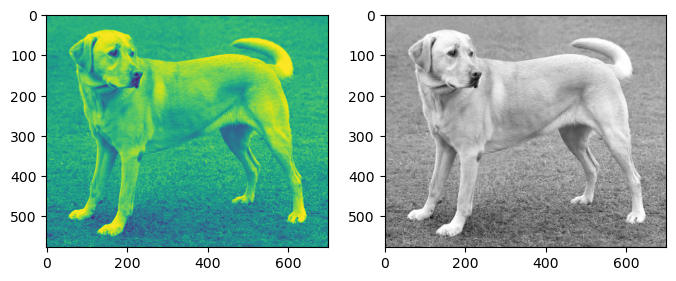

In [12]:
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE) #gray 포맷으로 가져옴
image_grgb = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB) # gray => rgb 로
print(image_gray.shape, image_grgb.shape)
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(image_gray)
axes[1].imshow(image_grgb)
plt.show()

In [13]:
# 이미지 저장
cv2.imwrite('data/openCV/gray.jpg', image_gray)
cv2.imwrite('data/openCV/grgb.jpg', image_grgb)

True

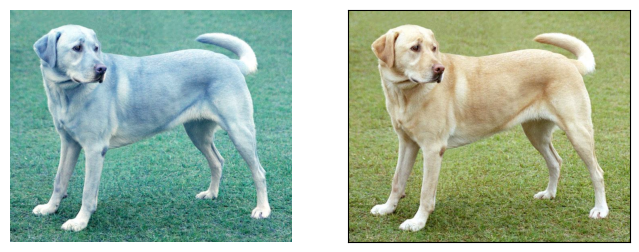

In [27]:
# bgr이미지의 b, g, r 채널값을 조정해서 rgb 포맷 으로 변경
image_bgr = cv2.imread('data/sample.jpg', cv2.IMREAD_ANYCOLOR)
b, g, r = cv2.split(image_bgr)
image_rgb = cv2.merge([r, g, b])
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(image_bgr)
axes[0].axis('off') # 축 생략
axes[1].imshow(image_rgb)
axes[1].set_xticks([]) # 축을 빈 리스트로
axes[1].set_yticks([])
plt.show()

# 2절 도형 그리기

In [ ]:
# 선그리기
img = np.full((100,200, 3), # 100행 200열
             255, # 배열 안에 채울 값
             dtype=np.uint8) # 배열안의 값의 타입이 부호가 없는 정수(unsigned int 8 bit)
cv2.line(img, # img 위에 line을 추가
        (20,20), # 선 시작점 (x, y)
        (80,20), # 선 끝점 (x, y)
        (255,0,0), # 선 색상 cv2에서는 BGR
        1) # 선 굵기
cv2.line(img,
       (50,60),
       (90,80),
       (0, 255, 0),
       3)
cv2.imwrite('data/openCV/line.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# cv2.imshow('line', img) # 저장된 파일과 같은 포맷으로 출력
# cv2.waitKey(0) # 키보드 입력할 때 까지 기다리기 
# cv2.destroyAllWindows() # 키보드 입력시 openCV 창 모두 닫기

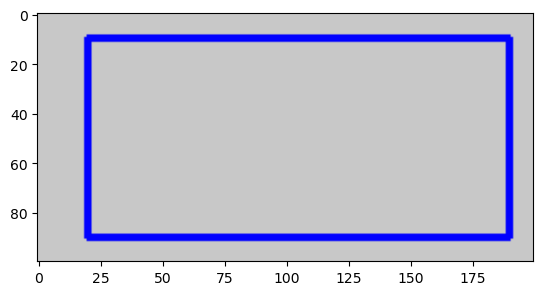

In [3]:
# 사각형 그리기
img = np.full((100,200,3),
             200,
             dtype=np.uint8)
cv2.rectangle(img,
             (20,10), # 사각형 왼쪽 윗부분 좌표
             (190,90), # 사각형 오른쪽
             (255,0,0),
             2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

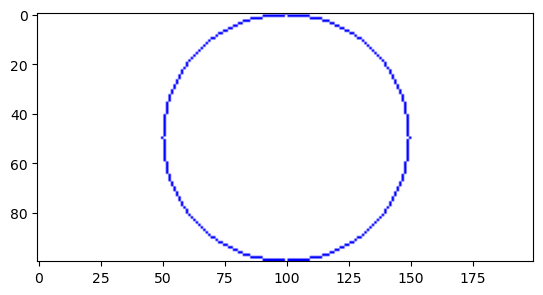

In [23]:
# 원그리기
img = np.full((100,200,3),
             255,
             dtype=np.uint8)
cv2.circle(img,
          (100,50), # 원 중심점 (x, y)
          50, # 반지름
          (255,0,0), # 원색상
          1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

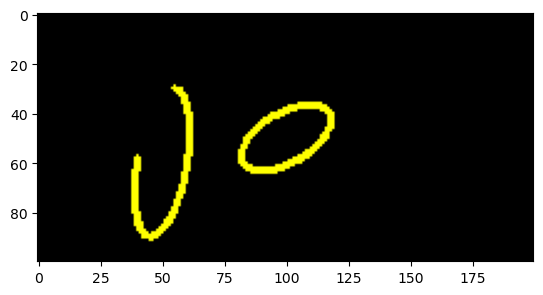

In [35]:
# 호와 타원그리기
img = np.zeros((100,200,3),
              dtype=np.uint8)
# 타원 추가
cv2.ellipse(img,
           (100,50), # 타원의 중심(x,y)
           (20, 10), # 두 축의 반지름 (가로, 세로)
           -30, # 반시계 반향 30도 회전
           0, 360, # 타원의 시작 각도 ~ 끝 각도
           (0, 255, 255),
           2)

cv2.ellipse(img,
           (50,60), # 타원의 중심(x,y)
           (30, 10), # 두 축의 반지름 (가로, 세로)
           -80, # 반시계 반향 30도 회전
           0, 270, # 타원의 시작 각도 ~ 끝 각도
           (0, 255, 255),
           2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

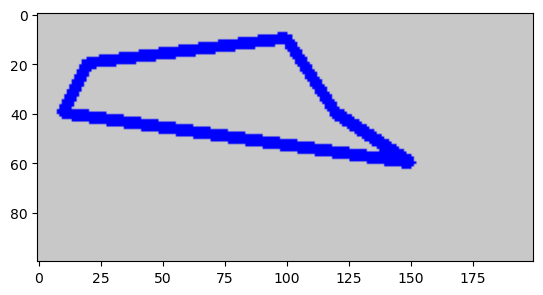

In [40]:
# 다각형
img = np.full((100,200,3),
              200,
              dtype=np.uint8)
points = np.array([[10,40],
                  [20,20],
                  [100,10],
                  [120,40],
                  [150,60]]) # 꼭지점 좌표들 (x,y)
cv2.polylines(img,
             [points], # 꼭지점 좌표
             True, # true 다각형 , False : 열린다각형
             (255,0,0),
             3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

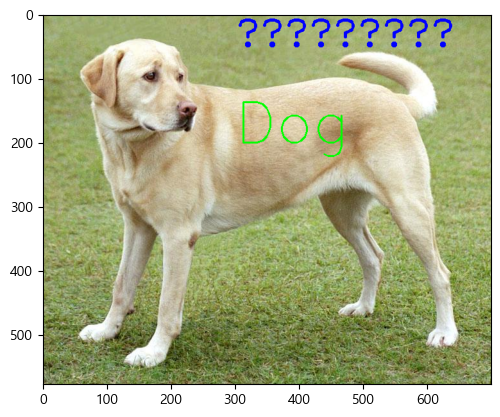

In [45]:
# 문자열 표시하기
plt.rc('font', family='Malgun Gothic')
img = cv2.imread('data/sample.jpg')
cv2.putText(img,
           '강아지', # 추가할 문자열
           (300,50), # 문자열 표시할 좌표
           cv2.FONT_HERSHEY_DUPLEX,
           2, # 폰트 scale
           (255,0,0), # 폰트 색상
           2) # 폰트 두께
cv2.putText(img,
           'Dog',
           (300,200),
           cv2.FONT_ITALIC,
           3,
           (0, 255, 0),
           2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

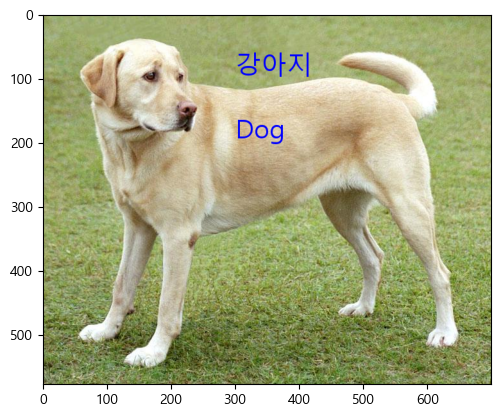

In [49]:
from PIL import Image, ImageDraw, ImageFont
img = cv2.imread('data/sample.jpg')
img_rgb = cv2.cvtColor(img,
                      cv2.COLOR_BGR2RGB) # 넘파이 배열
img_pil = Image.fromarray(img) # Image 타입
draw = ImageDraw.Draw(img_pil) # 이미지에 글씨를 draw 하는 객체
font = ImageFont.truetype('malgun.ttf', 40) 

# text 추가
draw.text((300,50),
         '강아지',
         font=font,
         fill=(255,0,0))
draw.text((300,150),
         'Dog',
         font=font,
         fill=(255,0,0))

img = np.array(img_pil)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

cv2.imwrite('data/openCV/sample.jpg', img)